In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.layers import LSTM, RNN
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, GRU
import time
from datetime import timezone
from datetime import datetime


In [2]:
from tensorflow.compat.v1.keras.backend import get_session
tf.compat.v1.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive



# Data Prep

In [ ]:
dataset = pd.read_pickle('/content/drive/MyDrive/Thesis/DATASETS/NU_1.pkl')
dataset.head()

,driven_by_charter,quantity,trip_ordering,driver_id,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear,scheduled_hour,scheduled_minute,travel_time
0,1,1,1,20,13,33,1,3,7,0,2.700000
1,0,1,1,0,13,31,1,3,16,0,5.333333
2,1,1,2,20,13,36,1,3,8,3,1.100000
3,1,1,3,20,13,37,1,3,8,59,2.016667
4,0,1,2,0,13,37,1,3,16,22,2.683333


In [ ]:
dataset.reset_index(drop=True)

,driven_by_charter,quantity,trip_ordering,driver_id,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear,scheduled_hour,scheduled_minute,travel_time
0,1,1,1,20,13,33,1,3,7,0,2.700000
1,0,1,1,0,13,31,1,3,16,0,5.333333
2,1,1,2,20,13,36,1,3,8,3,1.100000
3,1,1,3,20,13,37,1,3,8,59,2.016667
4,0,1,2,0,13,37,1,3,16,22,2.683333
...,...,...,...,...,...,...,...,...,...,...,...
137026,1,1,26,195,12,45,5,12,14,17,30.483333
137027,1,1,17,119,12,41,5,12,14,15,48.383333
137028,1,1,18,119,13,29,5,12,15,1,59.266667
137029,0,1,11,25,6,0,1,12,11,26,242.500000


In [ ]:
data, target = dataset.drop(['travel_time'],1), dataset['travel_time']

In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.20, random_state=1)

In [ ]:
test_x

,driven_by_charter,quantity,trip_ordering,driver_id,dept_hour,dept_minute,dept_dayofweek,dept_monthofyear,scheduled_hour,scheduled_minute
50434,1.0,0.000,0.022727,0.342975,0.478261,0.067797,0.2,0.909091,0.235294,0.000000
44517,1.0,0.000,0.136364,0.334711,0.347826,0.627119,0.4,0.818182,0.411765,0.135593
81246,1.0,0.000,0.136364,0.491736,0.652174,0.881356,0.6,0.272727,0.764706,0.338983
88521,1.0,0.000,0.181818,0.491736,0.434783,0.067797,0.6,0.272727,0.411765,0.118644
45624,1.0,0.000,0.204545,0.752066,0.391304,0.152542,0.2,0.818182,0.352941,0.169492
...,...,...,...,...,...,...,...,...,...,...
22813,1.0,0.000,0.181818,0.500000,0.521739,0.406780,0.6,0.545455,0.529412,0.779661
135266,1.0,0.000,0.363636,0.450413,0.695652,0.779661,0.6,1.000000,0.764706,0.881356
71730,1.0,0.025,0.250000,0.595041,0.739130,0.949153,0.4,0.090909,0.823529,0.322034
57429,1.0,0.000,0.340909,0.450413,0.739130,0.542373,0.6,1.000000,0.823529,0.881356


In [ ]:
train_test_data = [train_x, test_x, train_y, test_y]
name = ['train_x', 'test_x', 'train_y', 'test_y']

import pickle

for d,n in zip(train_test_data,name):
  with open('/content/drive/MyDrive/Thesis/DATASETS/NU_1_data/'+ n +'.pkl','wb') as f:
    pickle.dump(d, f)

In [3]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

def data_preprocesing(data,target,data_len):

  scaler = MinMaxScaler()

  data.iloc[:,0:] = scaler.fit_transform(data.iloc[:,0:].to_numpy())

  X = data
  y = target

  data_x = np.array(X, dtype=float)
  data_x = data_x.reshape((data_len,10,1))

  target = np.array(y, dtype=float)
  # target = target.reshape(169113,1,1)

  return data_x, target

In [6]:
import pickle

with open('/content/drive/MyDrive/Thesis/DATASETS/NU_1_data/train_x.pkl','rb') as f:
  train_x = pickle.load(f)

with open('/content/drive/MyDrive/Thesis/DATASETS/NU_1_data/train_y.pkl','rb') as f:
  train_y = pickle.load(f)

with open('/content/drive/MyDrive/Thesis/DATASETS/NU_1_data/test_x.pkl','rb') as f:
  test_x = pickle.load(f)

with open('/content/drive/MyDrive/Thesis/DATASETS/NU_1_data/test_y.pkl','rb') as f:
  test_y = pickle.load(f)

In [7]:
train_x, train_y = data_preprocesing(train_x, train_y,109624)
test_x, test_y = data_preprocesing(test_x, test_y,27407)

# Model Training

In [ ]:
# model = Sequential()  
# model.add(LSTM(17, input_shape=(1, 100),return_sequences=True))
# model.add(Dense(100))
# model.compile(loss='mean_absolute_error', optimizer='adam',metrics=['accuracy'])
# model.fit(data, target, epochs=1000, batch_size=1, verbose=2,validation_data=(x_test, y_test))

In [ ]:
# callback = callbacks.EarlyStopping(monitor='val_loss', patience = 3)

model = Sequential()  
model.add(LSTM(64, input_shape=(10, 1),return_sequences=True))
model.add(LSTM(64))
model.add(Dense(64))
# model.add(Dense(64))
model.add(Dense(1, activation= "linear"))
model.compile(loss='mean_absolute_error',optimizer='adam',metrics=['accuracy','mse'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 10, 64)            16896     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 54,145
Trainable params: 54,145
Non-trainable params: 0
_________________________________________________________________


In [ ]:
tmp = time.time()
# epochs=50
# learning_rate = 0.1
# decay_rate = learning_rate / epochs
# momentum = 0.8

history = model.fit(train_x,train_y,epochs=50, validation_data=(test_x,test_y))
gpu_time = time.time() - tmp
print("GPU Training Time: %s seconds" % (str(gpu_time)))

Train on 109624 samples, validate on 27407 samples
Epoch 1/50
109600/109624 [============================>.] - ETA: 0s - loss: 29.4328 - acc: 3.9234e-04 - mean_squared_error: 3804.7690

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2426: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


109624/109624 [==============================] - 46s 420us/sample - loss: 29.4301 - acc: 3.9225e-04 - mean_squared_error: 3804.0518 - val_loss: 29.6847 - val_acc: 3.6487e-04 - val_mean_squared_error: 4002.3176
Epoch 2/50
109624/109624 [==============================] - 45s 413us/sample - loss: 28.8441 - acc: 3.9225e-04 - mean_squared_error: 3594.1370 - val_loss: 29.1520 - val_acc: 3.6487e-04 - val_mean_squared_error: 3717.7412
Epoch 3/50
109624/109624 [==============================] - 46s 416us/sample - loss: 28.6458 - acc: 3.9225e-04 - mean_squared_error: 3496.5078 - val_loss: 29.1148 - val_acc: 3.6487e-04 - val_mean_squared_error: 3502.7898
Epoch 4/50
109624/109624 [==============================] - 46s 421us/sample - loss: 27.9649 - acc: 3.9225e-04 - mean_squared_error: 3270.8860 - val_loss: 27.8608 - val_acc: 3.6487e-04 - val_mean_squared_error: 3244.4946
Epoch 5/50
109624/109624 [==============================] - 46s 418us/sample - loss: 25.5878 - acc: 3.9225e-04 - mean_squared_e

# Save Model

In [ ]:
model.save('/content/drive/MyDrive/Thesis/DATASETS/LSTM/LSTM_NU_1.h5')

# Load Model

In [8]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Thesis/DATASETS/LSTM/LSTM_NU_1.h5')

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


# Train Accuracy

In [18]:
prediction = model.predict(train_x)
prediction = [i[0] for i in prediction]

pre_ac = pd.DataFrame()

pre_ac['Actual'] = train_y
pre_ac['Prediction'] = prediction

# import seaborn as sns

# sns.lmplot(x="Actual", y="Prediction", data=pre_ac);

In [19]:
pre_ac.to_pickle('lstm_NU_1_train.pkl')

In [12]:
mae = mean_absolute_error(train_y, prediction)
errors = abs(prediction - train_y)
# mape = 100 * np.mean(np.abs(errors / test_y))
# accuracy = 100 - mape
MSE = np.square(np.subtract(train_y,prediction)).mean() 
RMSE = math.sqrt(MSE)
R2 = r2_score(train_y,prediction)

print('Model Performance')
print('MAE: {:0.4f} minutes.'.format(np.mean(errors)))
print('RMSE: {:0.2f}.'.format(RMSE))
print('R2: {:0.2f}.'.format(R2))
# print('Accuracy = {:0.2f}%.'.format(accuracy))

Model Performance
MAE: 13.4661 minutes.
RMSE: 24.54.
R2: 0.83.


# Test Accuracy

In [22]:
prediction = model.predict(test_x)

In [23]:
prediction = [i[0] for i in prediction]

In [24]:
pre_ac = pd.DataFrame()

pre_ac['Actual'] = test_y
pre_ac['Prediction'] = prediction

In [25]:
pre_ac.to_pickle('lstm_NU_1_result.pkl')

In [26]:
# pre_ac.plot()

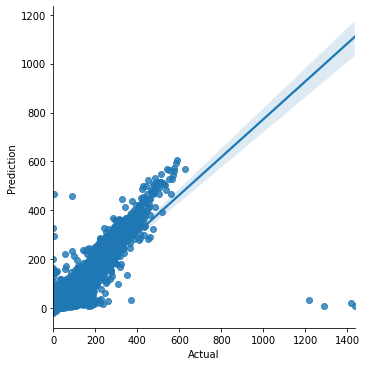

In [27]:
import seaborn as sns

sns.lmplot(x="Actual", y="Prediction", data=pre_ac);

In [28]:
from sklearn.metrics import mean_absolute_error, r2_score
import math

def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    mae = mean_absolute_error(test_labels, predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(np.abs(errors / test_labels))
    accuracy = 100 - mape
    MSE = np.square(np.subtract(test_labels,predictions)).mean() 
    RMSE = math.sqrt(MSE)
    R2 = r2_score(test_labels,predictions)
    print('Model Performance')
    print('MAE: {:0.4f} minutes.'.format(np.mean(errors)))
    print('RMSE: {:0.2f}.'.format(RMSE))
    print('R2: {:0.2f}.'.format(R2))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

In [29]:
mae = mean_absolute_error(test_y, prediction)
errors = abs(prediction - test_y)
mape = 100 * np.mean(np.abs(errors / test_y))
accuracy = 100 - mape
MSE = np.square(np.subtract(test_y,prediction)).mean() 
RMSE = math.sqrt(MSE)
R2 = r2_score(test_y,prediction)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


In [30]:
print('Model Performance')
print('MAE: {:0.4f} minutes.'.format(np.mean(errors)))
print('RMSE: {:0.2f}.'.format(RMSE))
print('R2: {:0.2f}.'.format(R2))

Model Performance
MAE: 16.5969 minutes.
RMSE: 29.97.
R2: 0.76.


In [ ]:
!pip install shap

     |████████████████████████████████| 358kB 28.3MB/s 
  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=491628 sha256=8c782e5a10a29ae83038bc4061de99a4684f99d9700f716c23af9eba3883cc29
  Stored in directory: /root/.cache/pip/wheels/15/27/f5/a8ab9da52fd159aae6477b5ede6eaaec69fd130fa0fa59f283
Successfully built shap


In [ ]:
import shap

explainer = shap.DeepExplainer(model,train_x[0:10000])
shap_values = explainer.shap_values(test_x[0:10])

Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode. See PR #1483 for discussion.
You have provided over 5k background samples! For better performance consider using smaller random sample.


In [ ]:
a = np.array([x[0] for x in shap_values[0][0]])

In [ ]:
shap_value = np.array([[x[0] for x in shap_values[0][y]] for y in range(0,len(shap_values[0]))])

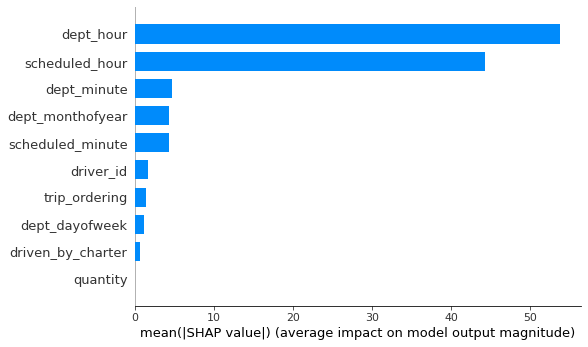

In [ ]:
shap.summary_plot(shap_value, train_x, feature_names = data.columns, plot_type="bar")

In [ ]:
# import matplotlib.pyplot as plt

# f = plt.figure()
# shap.summary_plot(shap_value, test_data, feature_names = test_data.columns)

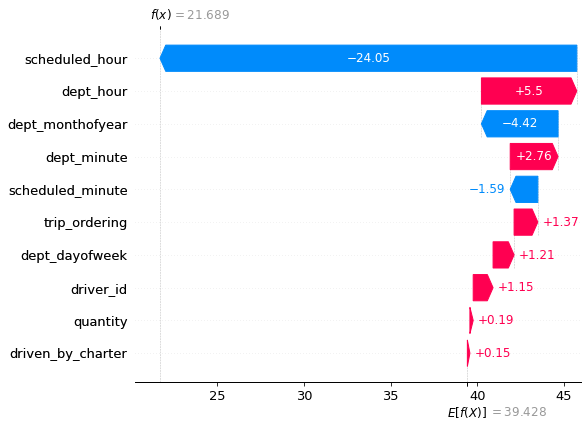

In [ ]:
'''The explanation below shows features each contributing to push the model output from the base value 
(the average model output over the training dataset we passed) to the model output. Features pushing the 
prediction higher are shown in red, those pushing the prediction lower are in blue.'''
# load JS visualization code to notebook
shap.initjs()

shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0], a, feature_names = data.columns, show = True)

In [ ]:
# visualize the first prediction's explanation with a force plot
shap.initjs()
shap.force_plot(explainer.expected_value, a, feature_names = data.columns, show = True)